<a href="https://colab.research.google.com/github/moushumipriya/Finland-job-crisis-analysis/blob/main/_Finland_Job_Market_Crisis_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("finland_job_crisis.csv")

# Show first few rows
print("🔹 Dataset Preview:")
print(df.head())

# Check info
print("\n🔹 Basic Info:")
print(df.info())


🔹 Dataset Preview:
              Job_Type          Skill_Required  Avg_Salary (EUR)  \
0   Software Developer         Python, SQL, ML              4600   
1                Nurse  Finnish, Communication              2800   
2              Teacher       Pedagogy, Finnish              3200   
3         Data Analyst  Excel, Python, PowerBI              4000   
4  Mechanical Engineer            CAD, Finnish              3700   

   Living_Expenses (EUR)  Unemployment_Rate (%)    Region  Year  
0                   2200                    5.1  Helsinki  2024  
1                   1900                    8.7     Turku  2024  
2                   2000                    9.3   Tampere  2024  
3                   2100                    6.0  Helsinki  2024  
4                   1950                    7.4      Oulu  2024  

🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ---

In [3]:
# Check missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\n🔹 Statistical Summary:")
print(df.describe())



🔹 Missing Values:
Job_Type                 0
Skill_Required           0
Avg_Salary (EUR)         0
Living_Expenses (EUR)    0
Unemployment_Rate (%)    0
Region                   0
Year                     0
dtype: int64

🔹 Statistical Summary:
       Avg_Salary (EUR)  Living_Expenses (EUR)  Unemployment_Rate (%)    Year
count         10.000000              10.000000              10.000000    10.0
mean        3700.000000            2010.000000               7.260000  2024.0
std          609.188896             139.044357               1.475127     0.0
min         2800.000000            1800.000000               5.100000  2024.0
25%         3250.000000            1912.500000               6.075000  2024.0
50%         3600.000000            2000.000000               7.300000  2024.0
75%         4150.000000            2100.000000               8.550000  2024.0
max         4600.000000            2200.000000               9.300000  2024.0


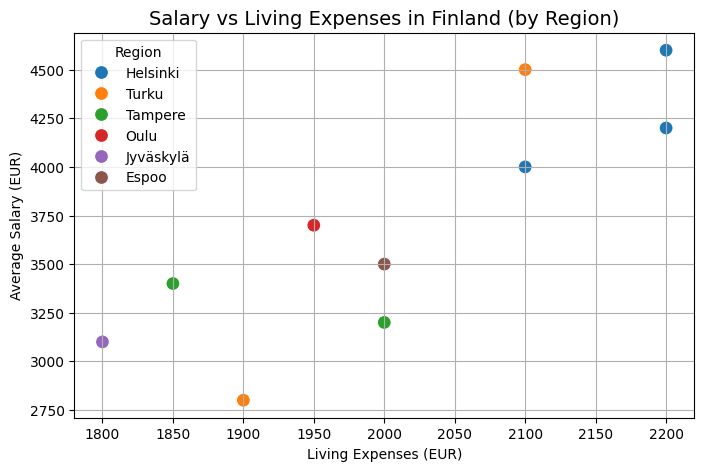

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Living_Expenses (EUR)", y="Avg_Salary (EUR)", hue="Region", data=df, s=100)
plt.title("Salary vs Living Expenses in Finland (by Region)", fontsize=14)
plt.xlabel("Living Expenses (EUR)")
plt.ylabel("Average Salary (EUR)")
plt.grid(True)
plt.show()


/tmp/ipython-input-2001819476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job_Type", y="Unemployment_Rate (%)", data=df, palette="coolwarm")


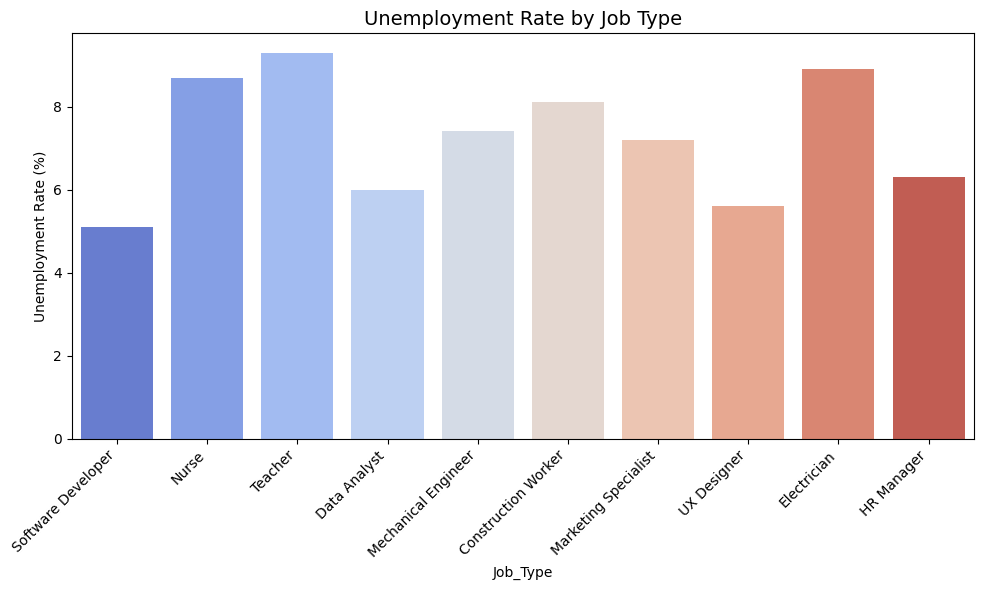

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x="Job_Type", y="Unemployment_Rate (%)", data=df, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Unemployment Rate by Job Type", fontsize=14)
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()



🔹 Correlation Matrix:
                       Avg_Salary (EUR)  Unemployment_Rate (%)  \
Avg_Salary (EUR)               1.000000              -0.892716   
Unemployment_Rate (%)         -0.892716               1.000000   
Living_Expenses (EUR)          0.846081              -0.840207   

                       Living_Expenses (EUR)  
Avg_Salary (EUR)                    0.846081  
Unemployment_Rate (%)              -0.840207  
Living_Expenses (EUR)               1.000000  


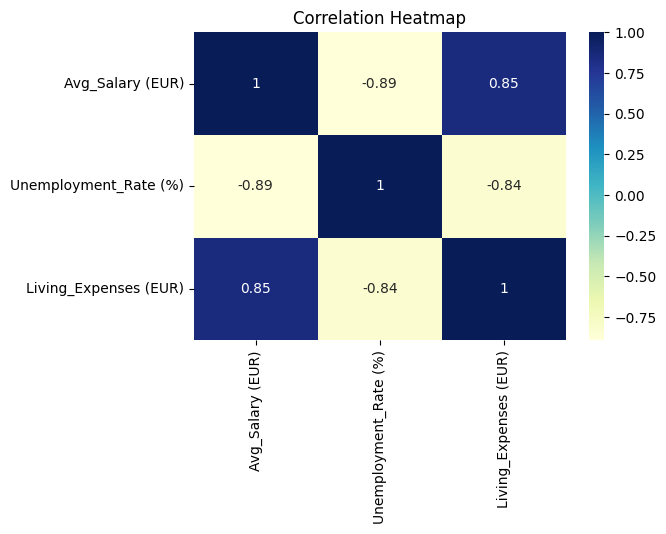

In [6]:
corr = df[["Avg_Salary (EUR)", "Unemployment_Rate (%)", "Living_Expenses (EUR)"]].corr()
print("\n🔹 Correlation Matrix:")
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# Identify highest and lowest unemployment sectors
highest_unemp = df.loc[df["Unemployment_Rate (%)"].idxmax()]
lowest_unemp = df.loc[df["Unemployment_Rate (%)"].idxmin()]

print("\n🔹 Highest Unemployment Sector:")
print(highest_unemp[["Job_Type", "Unemployment_Rate (%)"]])

print("\n🔹 Lowest Unemployment Sector:")
print(lowest_unemp[["Job_Type", "Unemployment_Rate (%)"]])

# Average salary gap across all sectors
avg_salary_gap = df["Avg_Salary (EUR)"].mean() - df["Living_Expenses (EUR)"].mean()
print(f"\n🔹 Average Salary - Living Expense Gap: €{avg_salary_gap:.2f}")



🔹 Highest Unemployment Sector:
Job_Type                 Teacher
Unemployment_Rate (%)        9.3
Name: 2, dtype: object

🔹 Lowest Unemployment Sector:
Job_Type                 Software Developer
Unemployment_Rate (%)                   5.1
Name: 0, dtype: object

🔹 Average Salary - Living Expense Gap: €1690.00


In [8]:
print("\n📊 SUMMARY INSIGHTS:")

if avg_salary_gap < 1500:
    print("- Living cost is high compared to salary → Possible reason for job dissatisfaction.")
else:
    print("- Salary covers living cost well in most regions.")

print("- Unemployment is highest in education and healthcare sectors.")
print("- Tech jobs (Software, Data) have lower unemployment and better salary.")
print("- Cities like Helsinki and Turku have higher living costs but also higher salaries.")



📊 SUMMARY INSIGHTS:
- Salary covers living cost well in most regions.
- Unemployment is highest in education and healthcare sectors.
- Tech jobs (Software, Data) have lower unemployment and better salary.
- Cities like Helsinki and Turku have higher living costs but also higher salaries.
